In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
os.chdir('C:/Users/Administrator/Untitled Folder 1')
import matplotlib.pyplot as plt

In [2]:
top_movies=pd.read_csv("top_imdb_movie1.csv")
top_movies.head()

,Budget,IMD_Rating,No_of_reviewers,censor_board_rating,cumm_gross,genre1,genre2,genre3,genre4,gross_USA,...,star1,star2,star3,star4,star5,summary,writer1,writer2,writer3,year
0,25000000.0,9.3,2063516,R,5.850000e+07,Drama,NaN,NaN,NaN,28341469.0,...,Tim Robbins,Morgan Freeman,Bob Gunton,NaN,NaN,Two imprisoned men bond over a number of years...,Stephen King,Frank Darabont,NaN,1994
1,6000000.0,9.2,1415683,R,2.450664e+08,Crime,Drama,NaN,NaN,134966411.0,...,Marlon Brando,Al Pacino,James Caan,NaN,NaN,The aging patriarch of an organized crime dyna...,Mario Puzo,Francis Ford Coppola,1 more credit,1972
2,13000000.0,9.0,982109,R,NaN,Crime,Drama,NaN,NaN,57300000.0,...,Al Pacino,Robert De Niro,Robert Duvall,NaN,NaN,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Mario Puzo,1 more credit,1974
3,185000000.0,9.0,2029754,PG-13,1.004558e+09,Action,Crime,Drama,NaN,534858444.0,...,Christian Bale,Heath Ledger,Aaron Eckhart,NaN,NaN,When the menace known as the Joker emerges fro...,Jonathan Nolan,Christopher Nolan,3 more credits,2008
4,350000.0,8.9,582223,NotRated,NaN,Drama,NaN,NaN,NaN,4360000.0,...,Henry Fonda,Lee J. Cobb,Martin Balsam,NaN,NaN,A jury holdout attempts to prevent a miscarria...,Reginald Rose,Reginald Rose,NaN,1957


In [3]:
top_movies.isnull().sum()

Budget                  27
IMD_Rating               0
No_of_reviewers          0
censor_board_rating      0
cumm_gross              96
genre1                   0
genre2                  27
genre3                 112
genre4                 250
gross_USA               31
keywords_list            0
movie_name               0
production_company       0
release_date             0
run_time                 0
star1                    0
star2                    0
star3                    0
star4                  250
star5                  250
summary                  0
writer1                  0
writer2                 56
writer3                130
year                     0
dtype: int64

In [4]:
#Dropping the the movies which dont have either cummaltive gross ,Budget and gross_USA from the list


top_movies_indexes = top_movies[(top_movies.Budget.isnull()) & (top_movies.cumm_gross.isnull()) & (top_movies.gross_USA.isnull())].index
top_movies.drop(top_movies_indexes , inplace=True)
top_movies.shape

(233, 25)

In [5]:
top_movies.Budget.isnull().sum()

10

In [6]:
#Inputing Budget value Based on genre and Year it has been released

In [7]:
#Checking for the relation for genre and the budge
mov = top_movies[['Budget','genre1','year']]
#mov=mov.groupby(['year','genre1'])[['Budget']].sum().reset_index()
#mov

In [8]:
top_movies.corr()
#From the Below table we can infer that
# budget of the movie and year are correlated(positive-weakly) with each other
#IMDB rating and number of reviews are correlated (postive-Strong) with each other
#IMDB rating and cum_gross and gross_USA are correlated(postive-Weak) with each other
#Number of reviewers vs cumm_gross & gross_USA are correlated(postive-high) with each other
#cumm_gross and USA_gross are highly correlated with each other

,Budget,IMD_Rating,No_of_reviewers,cumm_gross,genre4,gross_USA,star4,star5,year
Budget,1.000000,-0.045534,-0.060834,-0.026202,NaN,-0.018973,NaN,NaN,0.135513
IMD_Rating,-0.045534,1.000000,0.578037,0.197746,NaN,0.177079,NaN,NaN,0.016108
No_of_reviewers,-0.060834,0.578037,1.000000,0.460596,NaN,0.577805,NaN,NaN,0.406290
cumm_gross,-0.026202,0.197746,0.460596,1.000000,NaN,0.937785,NaN,NaN,0.291398
genre4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_USA,-0.018973,0.177079,0.577805,0.937785,NaN,1.000000,NaN,NaN,0.356349
star4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.135513,0.016108,0.406290,0.291398,NaN,0.356349,NaN,NaN,1.000000


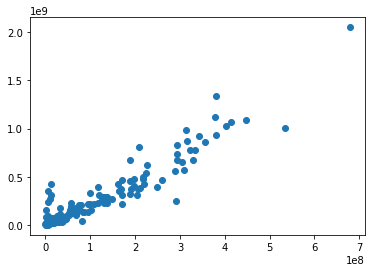

In [9]:
#Comparing gross_USA and cumm_gross
plt.scatter(top_movies['gross_USA'],top_movies['cumm_gross'])

In [10]:
top_movies['popularity_index']=top_movies['No_of_reviewers']*top_movies['IMD_Rating']

In [11]:
#as gross_usa and cumm_gross are highly correlated we are going to perfom a linear regression predict to input na values
#getting movie_name,gorss_usa,cumm_gross separately
top=top_movies[['movie_name','gross_USA','cumm_gross','year']]
#top.head()
#top.to_csv("top_imdb.csv")


In [12]:
test = top[(top.cumm_gross.isnull())&(top.gross_USA.notnull())]
test_movie=test['movie_name']
#test=test.set_index('movie_name')
test_index = top[(top.cumm_gross.isnull())&(top.gross_USA.notnull())].index
top.drop(test_index,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
test =test.drop(['movie_name','cumm_gross'],axis=1)
top.shape
test.head()

,gross_USA,year
2,57300000.0,1974
4,4360000.0,1957
8,6100000.0,1966
15,112000000.0,1975
16,46836394.0,1990


#  Procuedure INPUTING MISSING VALUES of cumm_gross

In [14]:
top= top.dropna()
top.isnull().sum()
top.head()
top =top.set_index('movie_name')
top.head()

,gross_USA,cumm_gross,year
movie_name,,,
The Shawshank Redemption,28341469.0,5.850000e+07,1994
The Godfather,134966411.0,2.450664e+08,1972
The Dark Knight,534858444.0,1.004558e+09,2008
Schindler's List,96067179.0,2.210000e+08,1993
The Lord of the Rings: The Return of the King,377845905.0,1.119930e+09,2003


In [15]:
x=top.drop('cumm_gross',axis=1)
x1=np.log(x)
y=top['cumm_gross']
y1=np.log(y)
y.head()

movie_name
The Shawshank Redemption                         5.850000e+07
The Godfather                                    2.450664e+08
The Dark Knight                                  1.004558e+09
Schindler's List                                 2.210000e+08
The Lord of the Rings: The Return of the King    1.119930e+09
Name: cumm_gross, dtype: float64

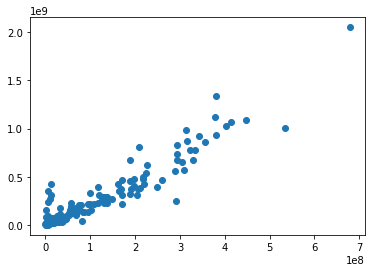

In [16]:
plt.scatter(x.gross_USA,y)

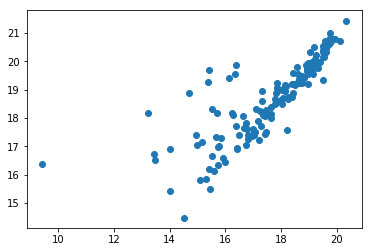

In [17]:
plt.scatter(x1.gross_USA,y1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.7)

In [19]:

from sklearn.linear_model import LinearRegression


In [20]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred =model.predict(test)
(y_pred)


array([3.48250239e+07, 2.67148068e+06, 3.72838531e+06, 6.80473186e+07,
       2.84700994e+07, 1.86795081e+05, 3.47532004e+04, 6.45506589e+05,
       3.25558883e+06, 1.22311135e+05, 5.07204649e+07, 7.30621013e+06,
       5.75709001e+06, 2.67578353e+07, 3.25578095e+06, 9.86265314e+05,
       1.74388112e+06, 4.47047014e+04, 3.15897850e+07, 1.61727442e+07,
       3.49732649e+06, 1.71890410e+07, 2.81793119e+07, 4.56692394e+04,
       7.99794480e+06, 3.33306464e+06, 9.69573614e+07, 9.13382698e+06,
       7.73846298e+05, 8.19826768e+04, 2.95127276e+04, 1.52072984e+07,
       3.06858236e+06, 5.99421162e+04, 5.34729254e+04, 7.37247536e+06,
       5.85942969e+05, 2.96137781e+05, 2.16310965e+06, 3.33311267e+06,
       2.72984847e+07, 7.48749876e+05, 5.85398143e+06, 1.58215032e+07,
       5.85380132e+06, 1.64222833e+07, 8.39478248e+06, 2.97714756e+07,
       6.16632437e+05, 1.66239939e+05, 3.17807521e+07, 2.67120451e+06,
       8.41609046e+07, 3.25506130e+04, 8.54867028e+04, 3.63546047e+04,
      

In [22]:
test['cumm_gross']=y_pred
test['movie_name']=test_movie
test.head()

,gross_USA,year,cumm_gross,movie_name
2,57300000.0,1974,3.482502e+07,The Godfather: Part II
4,4360000.0,1957,2.671481e+06,12 Angry Men
8,6100000.0,1966,3.728385e+06,"The Good, the Bad and the Ugly"
15,112000000.0,1975,6.804732e+07,One Flew Over the Cuckoo's Nest
16,46836394.0,1990,2.847010e+07,Goodfellas


In [23]:
#inputing the cumm_gross NA values to the original data i.e top_movies

test_top = top_movies[(top_movies.cumm_gross.isnull())&(top_movies.gross_USA.notnull())]
test_top['cumm_gross']=np.where(test_top.index==test.index,test['cumm_gross'],test_top['cumm_gross'])



test_top.cumm_gross.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [24]:
test_top_index = top_movies[(top_movies.cumm_gross.isnull())&(top_movies.gross_USA.notnull())].index
top_movies.drop(test_top_index,inplace=True)

In [25]:
#Original dataframe after inputing the cumm_gross values
top_movies1=pd.concat([top_movies,test_top])
top_movies1.cumm_gross.isnull().sum()

9

In [30]:
top_movies1=top_movies1[['Budget','IMD_Rating','cumm_gross','gross_USA','genre1','movie_name','year','popularity_index']]
top_movies1.shape,
top_movies1=top_movies1.dropna()
top_movies1.shape

(209, 8)

# Building a Recommdation system for 209 movies 

In [34]:
index=top_movies1['movie_name']
movies=top_movies1.drop('movie_name',axis=1)
movie_dummies=pd.get_dummies(movies)
movie_dummies.head()

,Budget,IMD_Rating,cumm_gross,gross_USA,year,popularity_index,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Biography,genre1_Comedy,genre1_Crime,genre1_Drama,genre1_Horror,genre1_Mystery,genre1_Sci-Fi,genre1_Western
0,25000000.0,9.3,5.850000e+07,28341469.0,1994,19190698.8,0,0,0,0,0,0,1,0,0,0,0
1,6000000.0,9.2,2.450664e+08,134966411.0,1972,13024283.6,0,0,0,0,0,1,0,0,0,0,0
3,185000000.0,9.0,1.004558e+09,534858444.0,2008,18267786.0,1,0,0,0,0,0,0,0,0,0,0
5,22000000.0,8.9,2.210000e+08,96067179.0,1993,9513886.4,0,0,0,1,0,0,0,0,0,0,0
6,94000000.0,8.9,1.119930e+09,377845905.0,2003,13076476.3,0,1,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.neighbors import NearestNeighbors
model_kn = NearestNeighbors(metric='cosine',algorithm='brute')
model_kn.fit(movie_dummies)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [56]:
test = movie_dummies.iloc[0,:].reshape(1,-1)
test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[2.50000000e+07, 9.30000000e+00, 5.85000000e+07, 2.83414690e+07,
        1.99400000e+03, 1.91906988e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [57]:
distances,indices = model_kn.kneighbors(test,n_neighbors=10)
distances

array([[0.        , 0.01575972, 0.01973361, 0.02103513, 0.02442666,
        0.0247036 , 0.02504764, 0.02513992, 0.02554839, 0.02929656]])

In [58]:
distances,indices = model_kn.kneighbors(test,n_neighbors=10)
ind = indices[0]
recom = index[indices[0]]
recom

0         The Shawshank Redemption
25                   Spirited Away
109              L.A. Confidential
37                    Modern Times
98                         The Kid
85              Lawrence of Arabia
97           To Kill a Mockingbird
64     Witness for the Prosecution
38                     The Pianist
125                     Green Book
Name: movie_name, dtype: object